In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from datetime import datetime
from source.visualization_helper import init_plot_style

In [3]:
init_plot_style()

# VisualDTA


# Big data analysis

In [7]:
ds = pd.read_csv('/Users/john/data/twitter/tweets_merged.csv', 
                 dtype={
                     'in_reply_to_status_id': object,
                       },
                 parse_dates=['timestamp']
                )
ds.shape

ValueError: 'timestamp' is not in list

In [6]:
ds.dtypes

id                                  int64
screen_name                        object
name                               object
statuses_count                      int64
followers_count                     int64
friends_count                       int64
favourites_count                    int64
time_zone                          object
utc_offset                        float64
geo_enabled                          bool
location                           object
description                        object
latitude                          float64
longitude                         float64
place_type                         object
place_name                         object
place_full_name                    object
place_country                      object
retweet_count                       int64
favorite_count                      int64
retweeted                            bool
possibly_sensitive                   bool
lang                               object
in_reply_to_status_id             

In [7]:
nonconv_tweets = ds[(ds.in_reply_to_status_id.isnull()) & (ds.num_child_replies==1)]
nonconv_tweets.shape

(1000, 34)

In [8]:
root_tweets = ds[(ds.in_reply_to_status_id.isnull()) & (ds.num_child_replies>1)]
root_tweets.shape

(1000, 34)

In [9]:
nonconv_tweets[['id']].to_csv('data/nonconvids.csv', index=False,header=False)
root_tweets[['id']].to_csv('data/convids.csv', index=False,header=False)


In [10]:
ds['is_conversation'] = -1
ds.loc[(ds.in_reply_to_status_id.isnull()) & (ds.num_child_replies==1), 'is_conversation'] = 0
ds.loc[(ds.in_reply_to_status_id.isnull()) & (ds.num_child_replies>1), 'is_conversation'] = 1
ds.groupby('is_conversation').size()

is_conversation
-1    7273
 0    1000
 1    1000
dtype: int64

In [11]:
dsmin = ds[['id', 'is_conversation']]
dsmin = dsmin[dsmin.is_conversation>=0]
dsmin.shape

(2000, 2)

once we generate the ids, and extract the info from cassandra, let analyze

In [12]:
urls = pd.read_csv('data/tweets_urls.csv', header=None, names=['id', 'url'])
urls.shape

(802, 2)

In [13]:
urls = urls.merge(dsmin, on='id', copy=False)
print(urls.shape)
urls.head()

(802, 3)


,id,url,is_conversation
0,813822648404713472,https://www.instagram.com/p/BOiBemyBQmy/,0
1,843897358966538241,http://articulo.mercadolibre.com.ec/MEC-411334...,0
2,812126000783982592,http://ln.is/www.granma.cu/cuba/2/45bCm,0
3,836080574251024385,https://www.instagram.com/p/BRALSbdjmINInfZkHT...,0
4,837114350360006657,http://bit.ly/2lY7Wm3,0


In [14]:
from urllib.parse import urlparse
o = urlparse('http://www.cwi.nl:80/%7Eguido/Python.html')
o

ParseResult(scheme='http', netloc='www.cwi.nl:80', path='/%7Eguido/Python.html', params='', query='', fragment='')

In [15]:
import requests
r = requests.head('http://bit.ly/2lY7Wm3', allow_redirects=True, verify=False)
r.url

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


'https://elpais.com/tag/accion_ejecutiva_reforma_inmigracion_2014/a/'

In [16]:
def is_short_ulr(url):
    shortdomains = ['youtu.be','tinyurl.com','lnkd.in']
    
    for sd in shortdomains:
        if sd in url:
            return True
        
    return False

is_short_ulr('youtu.be/videos=?xl')

True

In [17]:
def get_url_domain(url):
    domain=urlparse(url).netloc
    
    if len(domain) < 7 or is_short_ulr(domain):
        r=requests.head(url, allow_redirects=True, verify=False)
        domain=urlparse(r.url).netloc
    
    return domain

In [18]:
urls['domain'] = urls.url.apply(lambda u: get_url_domain(u))
urls.head()

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is be

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is be

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is be

,id,url,is_conversation,domain
0,813822648404713472,https://www.instagram.com/p/BOiBemyBQmy/,0,www.instagram.com
1,843897358966538241,http://articulo.mercadolibre.com.ec/MEC-411334...,0,articulo.mercadolibre.com.ec
2,812126000783982592,http://ln.is/www.granma.cu/cuba/2/45bCm,0,linkis.com
3,836080574251024385,https://www.instagram.com/p/BRALSbdjmINInfZkHT...,0,www.instagram.com
4,837114350360006657,http://bit.ly/2lY7Wm3,0,elpais.com


In [19]:
domains=urls.groupby('domain').size()
domains = domains.reset_index(name='count')
domains.sort_values('count', ascending=False, inplace=True)
#domains[domains.domain.str.len()<7]
domains.head()

,domain,count
66,twitter.com,405
100,www.instagram.com,152
116,www.trendinalia.com,30
125,www.youtube.com,30
28,elcomercio.pe,9


In [20]:
urls.dtypes

id                  int64
url                object
is_conversation     int64
domain             object
dtype: object

In [21]:
urlconvrate=urls.groupby('domain').agg({'url':'count', 
                           'is_conversation':'sum'})
urlconvrate=urlconvrate.reset_index()
urlconvrate['rate'] = urlconvrate['is_conversation'] / urlconvrate['url']
urlconvrate.sort_values('url', ascending=False, inplace=True)
urlconvrate.head()

,domain,url,is_conversation,rate
66,twitter.com,405,227,0.560494
100,www.instagram.com,152,11,0.072368
116,www.trendinalia.com,30,23,0.766667
125,www.youtube.com,30,16,0.533333
28,elcomercio.pe,9,9,1.000000


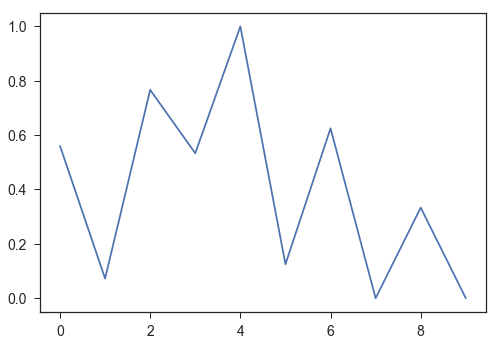

In [22]:
y=urlconvrate.rate.head(10)
x=range(len(y))

plt.plot(x, y, marker='x')

In [23]:
hashtags = pd.read_csv('data/tweets_hashtags.csv', header=None, names=['id', 'hashtag'])
hashtags.shape

(991, 2)

In [24]:
hashtags = hashtags.merge(dsmin, on='id', copy=False)
print(hashtags.shape)
hashtags.head()

(991, 3)


,id,hashtag,is_conversation
0,813822648404713472,Biocros,0
1,813822648404713472,Endorfinas,0
2,843897358966538241,DiaDeLaFelicidad,0
3,838880735088033793,QuieroQueEsteEnCocaColaFM,0
4,837114350360006657,Perú,0


In [25]:
htconvrate=hashtags.groupby('hashtag').agg({'id':'count', 
                           'is_conversation':'sum'})
htconvrate=htconvrate.reset_index()
htconvrate['rate'] = htconvrate['is_conversation'] / htconvrate['id']
htconvrate.sort_values('id', ascending=False, inplace=True)
htconvrate.head()

,hashtag,id,is_conversation,rate
832,trndnl,12,8,0.666667
309,KCAEstrellaLatina,9,0,0.000000
301,JuanpaZurita,7,0,0.000000
311,KCAMexico,7,2,0.285714
166,Ecuador,6,2,0.333333


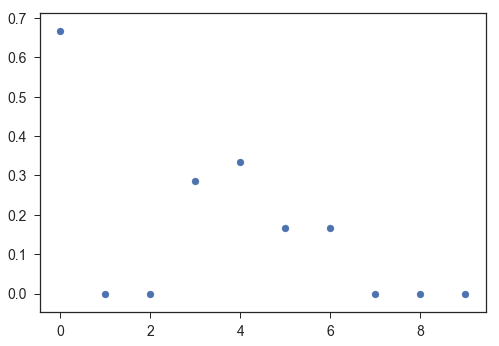

In [26]:
y=htconvrate.rate.head(10)
x=range(len(y))

plt.scatter(x, y, marker='o')

## conversations rate vs followers

In [51]:
root_tweets = ds[(ds.in_reply_to_status_id.isnull()) & (ds.num_child_replies>1)]
root_tweets.shape

(1000, 35)

In [56]:
crf = root_tweets.groupby('screen_name').agg(
    {
        'followers_count': 'max',
        'statuses_count' : 'max',
        'id': 'count',
        'is_conversation' : 'sum',
    })
crf.reset_index(inplace=True)
crf.rename(columns={'id':'tweets'}, inplace=True)
crf.sort_values('is_conversation', ascending=False, inplace=True)
crf.head()

,screen_name,followers_count,statuses_count,tweets,is_conversation
827,trendinaliaEC,34189,366300,29,29
9,AbrahamMateo,2179024,22322,6,6
740,nmosqueraa,1649,74022,6,6
319,MashiRafael,3149505,13457,5,5
524,canalN_,2171266,92234,5,5


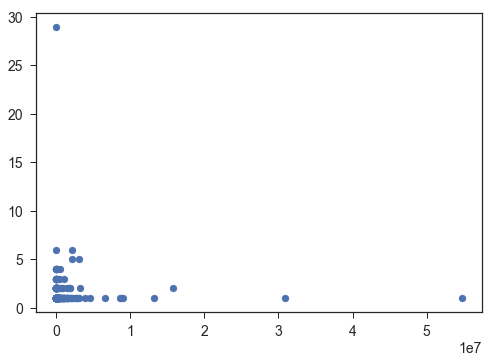

In [57]:
x=crf.followers_count.values
y=crf.is_conversation.values
plt.scatter(x, y, marker='o')

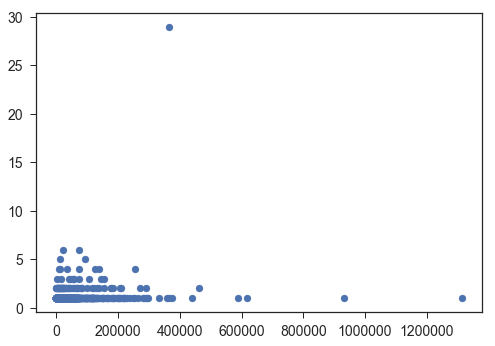

In [58]:
x=crf.statuses_count.values
y=crf.is_conversation.values
plt.scatter(x, y, marker='o')